In [1]:
# download data from # https://cellxgene.cziscience.com/collections/2d2e2acd-dade-489f-a2da-6c11aa654028
import os, sys
HOMEDIR = os.path.expanduser("~")
PROJDIR = rf"{HOMEDIR}/G-scIB_dev"
sys.path.append(rf"{PROJDIR}/src")

import Data_Handler as dh, Utils_Handler as uh
import umap, numpy as np, pandas as pd, scanpy as sc
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.settings.verbosity = 3

In [2]:
adata = sc.read_h5ad(dh.DATA_EMB_["lung_fetal_donor"])
obsm_keys = list(adata.obsm)
for embed in obsm_keys:
    print("%12s, %d" % (embed, adata.obsm[embed].shape[1]))
    assert adata.obsm[embed].shape[0] == np.unique(adata.obsm[embed], axis=0).shape[0]

     Harmony, 100
   Scanorama, 100
     X_bbknn, 2
       X_pca, 100
    X_scANVI, 30
      X_scVI, 30
      X_tsne, 2
      X_umap, 2
X_umap_original, 2
      scPoli, 10


In [3]:
sc.pp.highly_variable_genes(adata, subset=True, flavor="seurat_v3", n_top_genes=1000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [4]:
del adata.obsm
adata.write(rf"{dh.DATA_DIR}/lung_fetal_donor/emb_hvg.h5ad", compression="gzip")

In [5]:
adata = sc.read_h5ad(dh.DATA_EMB_["lung_fetal_organoid"])
obsm_keys = list(adata.obsm)
for embed in obsm_keys:
    print("%12s, %d" % (embed, adata.obsm[embed].shape[1]))
    assert adata.obsm[embed].shape[0] == np.unique(adata.obsm[embed], axis=0).shape[0]

     Harmony, 50
   Scanorama, 100
     X_bbknn, 2
X_original_umap, 2
       X_pca, 50
    X_scANVI, 30
      X_scVI, 30
      X_tsne, 2
      X_umap, 2
      scPoli, 10


In [6]:
sc.pp.highly_variable_genes(adata, subset=True, flavor="seurat_v3", n_top_genes=1000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [7]:
del adata.obsm
adata.write(rf"{dh.DATA_DIR}/lung_fetal_organoid/emb_hvg.h5ad", compression="gzip")

### Process the raw data

In [ ]:
adata = sc.read_h5ad(dh.DATA_RAW_["lung_fetal_donor"])
bdata = sc.read_h5ad(dh.DATA_RAW_["lung_fetal_organoid"])
cdata = sc.read_h5ad("/gpfs/scratchfs01/site/u/wangh256/GeneCBM_dev/data/FetalLung/Assembled10DomainsFiltered.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 71752 × 26354
    obs: 'batch', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'broad_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'n_cells', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'batch_colors', 'big_cluster_colors', 'broad_celltype_colors', 'chemistry_colors', 'default_embedding', 'phase_colors', 'rank_genes_groups_global', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap', 'X_umap_origi

In [4]:
bdata

AnnData object with n_obs × n_vars = 70495 × 24653
    obs: 'batch', 'percent_mito', 'n_counts', 'n_genes', 'transgene', 'S_score', 'G2M_score', 'phase', 'leiden', 'predicted_hi', 'new_celltype', 'phenotype', 'Souporcell3_status', 'Souporcell3_assignment', 'stage', 'dissection', 'chemistry', 'old_celltype', 'project', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'n_cells-in vitro', 'highly_variable-in vitro', 'Deep_n-in vitro', 'dispersions-in vitro', 'dispersions_norm-in vitro', 'n_cells-in vivo', 'highly_variable-in vivo', 'Deep_n-in vivo', 'gene_symbols', 'feature_is_filtered', 'highly_variable_n-in vitro', 'feature_name

In [5]:
for col in cdata.var.columns:
    if "highly_variable" in col:
        cdata.var.drop(columns=col, inplace=True)
    if "Deep_" in col:
        cdata.var.drop(columns=col, inplace=True)
    if "gene_ids-" in col:
        cdata.var.drop(columns=col, inplace=True)
    if "n_cells-" in col:
        cdata.var.drop(columns=col, inplace=True)
    if "dispersions-" in col:
        cdata.var.drop(columns=col, inplace=True)
    if "means-" in col:
        cdata.var.drop(columns=col, inplace=True)
    if "dispersions_norm-" in col:
        cdata.var.drop(columns=col, inplace=True)
cdata

AnnData object with n_obs × n_vars = 71752 × 26568
    obs: 'batch', 'stage', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'donor', 'gender', 'new_celltype-code', 'status_summary', 'productive_summary', 'isotype_summary', 'receptor_type', 'receptor_subtype', 'broad_celltype'
    var: 'gene_ids', 'n_cells'
    uns: 'batch_colors', 'big_cluster_colors', 'broad_celltype_colors', 'chemistry_colors', 'dissection_colors', 'new_celltype_colors', 'phase_colors', 'rank_genes_groups_global'
    obsm: 'X_pca', 'X_umap', 'X_umap_original'

In [6]:
cfg = {"frameon": False, "legend_fontsize": 10, "legend_fontoutline": 2}

In [7]:
adata.uns["new_celltype_colors"] = cdata.uns["new_celltype_colors"]

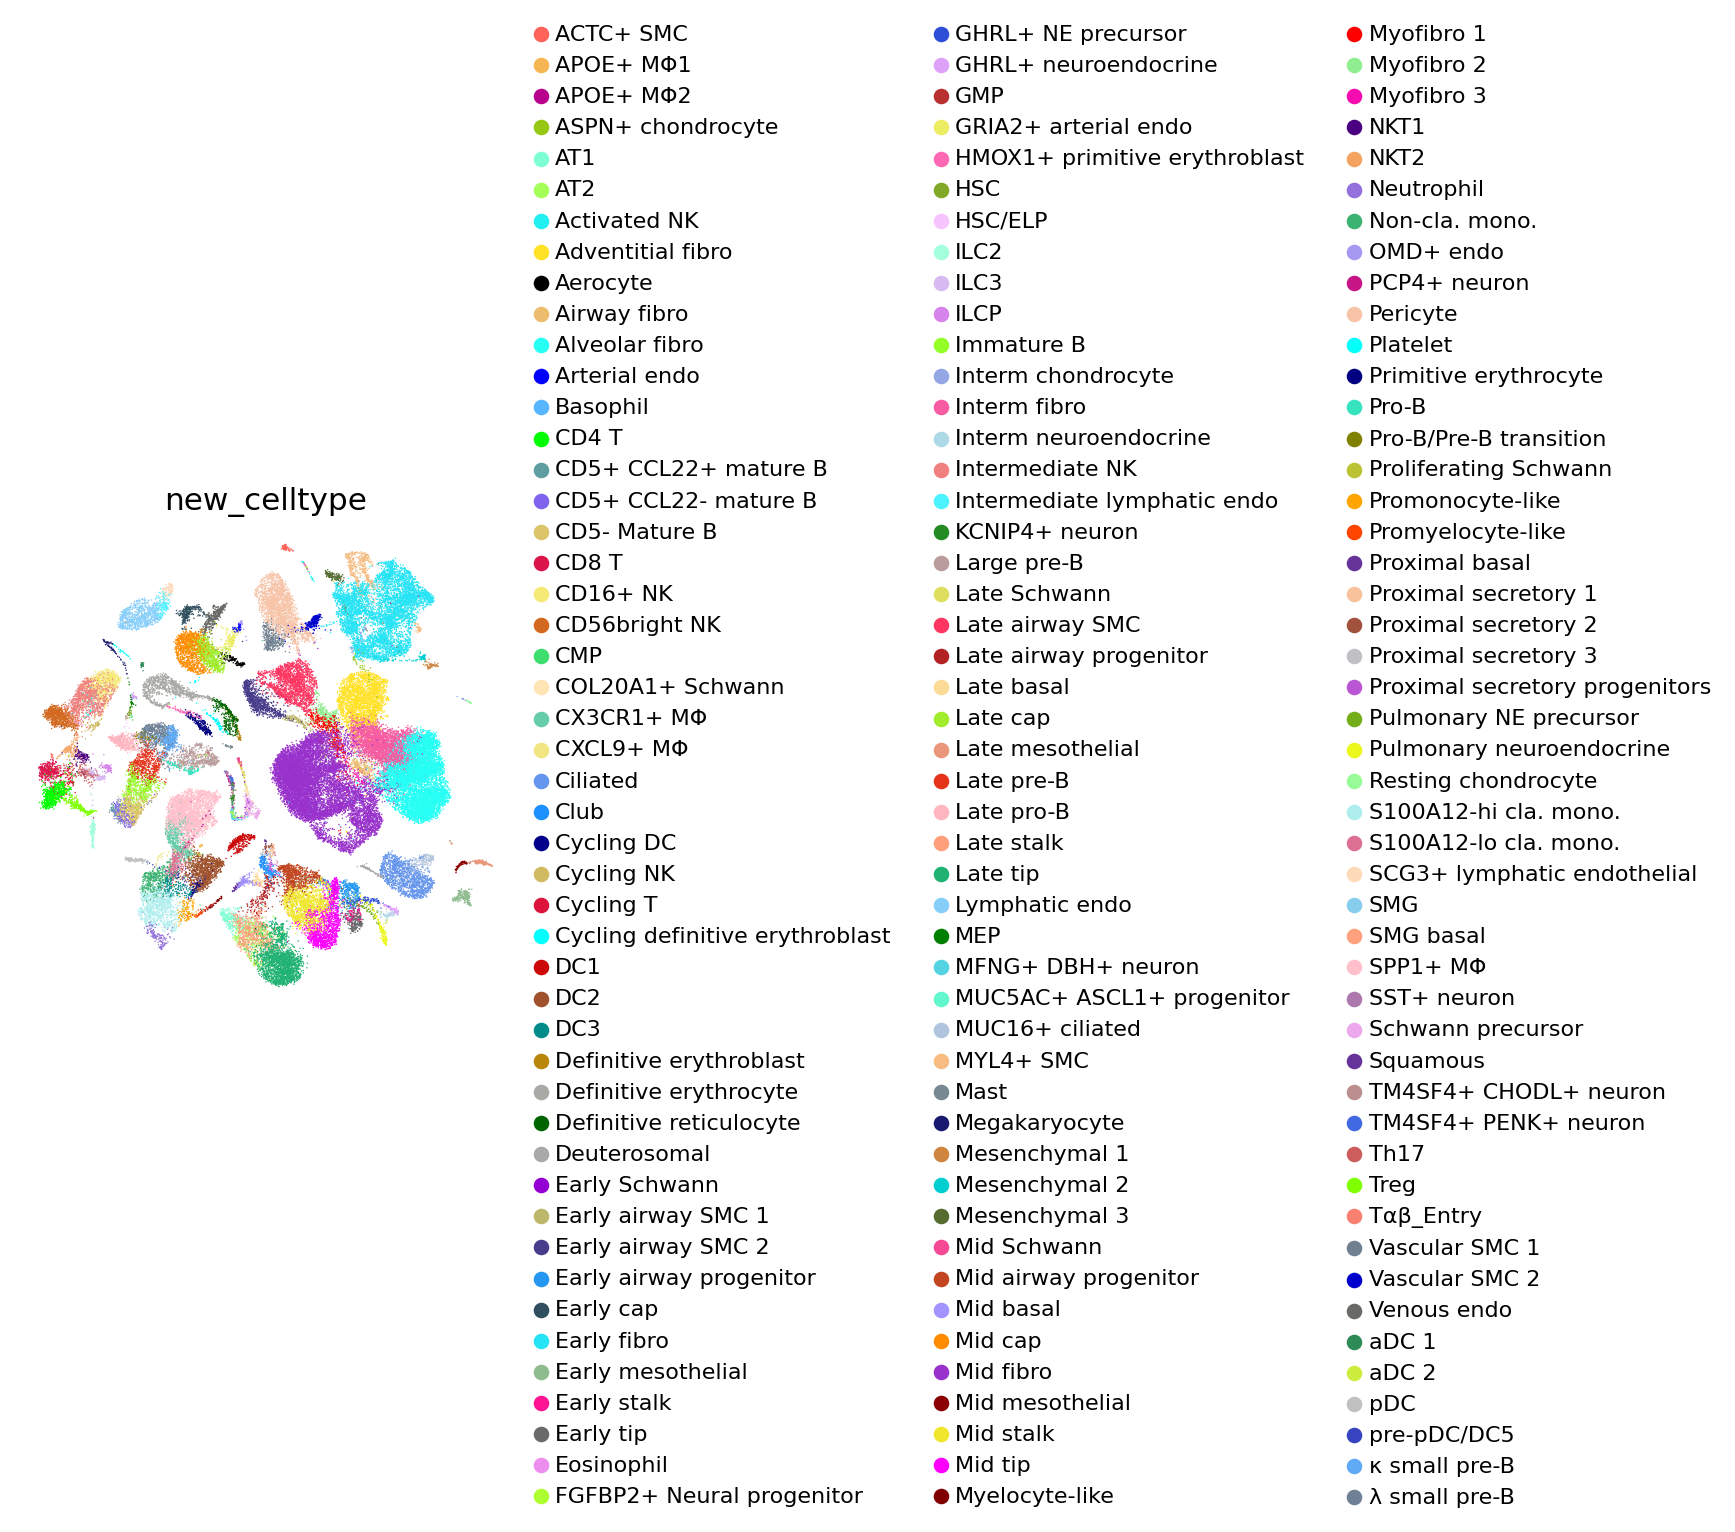

In [8]:
sc.pl.embedding(
    adata,
    basis="X_umap_original",
    color=["new_celltype"],
    **cfg
)

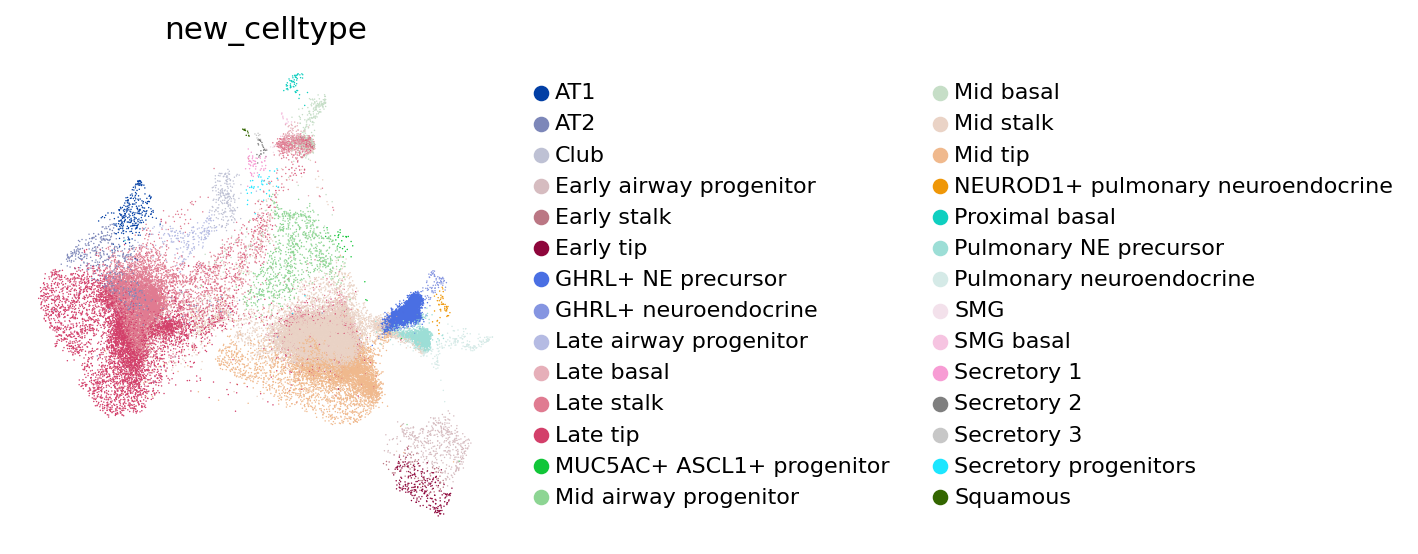

In [9]:
sc.pl.embedding(
    bdata,
    basis="X_umap",
    color=["new_celltype"],
    **cfg
)

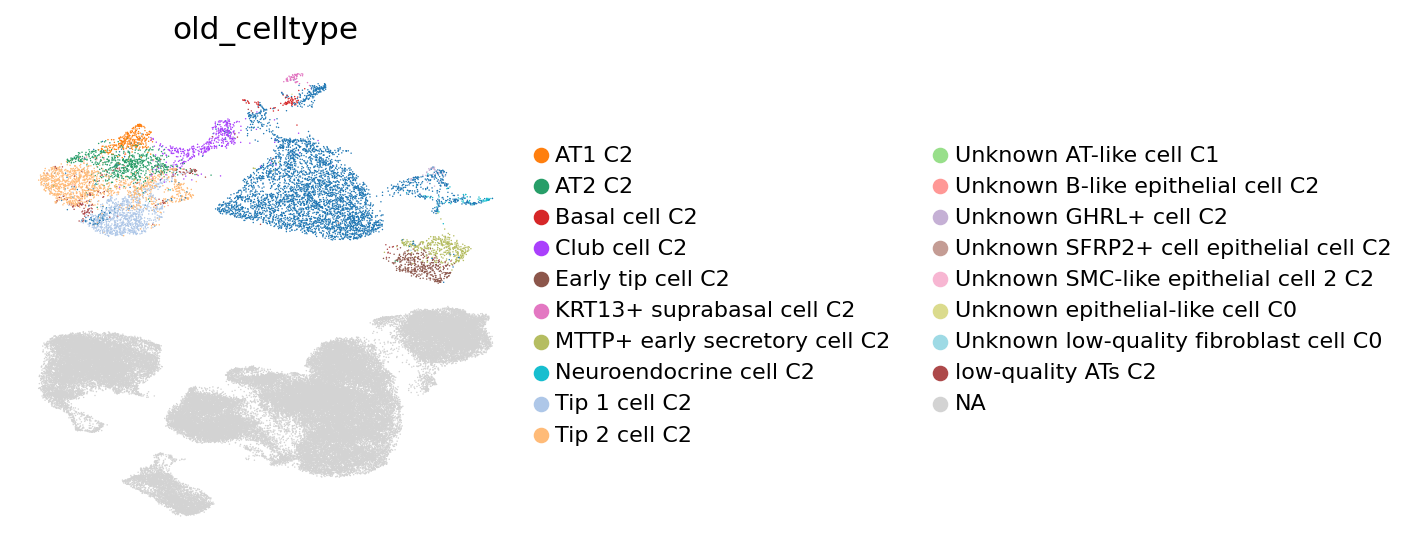

In [10]:
sc.pl.embedding(
    bdata,
    basis="X_original_umap",
    color=["old_celltype"],
    **cfg
)

In [11]:
adata.X = adata.raw.X
del adata.raw
uh.preprocess(adata)

filtered out 354 cells that have less than 1000 counts
filtered out 918 cells that have less than 500 genes expressed
filtered out 399 genes that are detected in less than 5 cells
25955 genes x 70480 cells after quality control.
normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


AnnData object with n_obs × n_vars = 70480 × 25955
    obs: 'batch', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'broad_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'n_cells', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'batch_colors', 'big_cluster_colors', 'broad_celltype_colors', 'chemistry_colors', 'default_embedding', 'phase_colors', 'rank_genes_groups_global', 'schema_version', 'title', 'log1p'
    obsm: 'X_pca', 'X_umap', 'X_u

In [12]:
bdata.X = bdata.raw.X
del bdata.raw
uh.preprocess(bdata)

filtered out 151 cells that have less than 1000 counts
filtered out 1 cells that have less than 500 genes expressed
filtered out 130 genes that are detected in less than 5 cells
24523 genes x 70343 cells after quality control.
normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


AnnData object with n_obs × n_vars = 70343 × 24523
    obs: 'batch', 'percent_mito', 'n_counts', 'n_genes', 'transgene', 'S_score', 'G2M_score', 'phase', 'leiden', 'predicted_hi', 'new_celltype', 'phenotype', 'Souporcell3_status', 'Souporcell3_assignment', 'stage', 'dissection', 'chemistry', 'old_celltype', 'project', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'n_cells-in vitro', 'highly_variable-in vitro', 'Deep_n-in vitro', 'dispersions-in vitro', 'dispersions_norm-in vitro', 'n_cells-in vivo', 'highly_variable-in vivo', 'Deep_n-in vivo', 'gene_symbols', 'feature_is_filtered', 'highly_variable_n-in vitro', 'feature_name

In [13]:
adata.obs["batch"].unique()

['5891STDY8062349', '5891STDY8062350', '5891STDY8062351', '5891STDY8062352', '5891STDY8062353', ..., '5891STDY9030806', '5891STDY9030807', '5891STDY9030808', '5891STDY9030809', '5891STDY9030810']
Length: 29
Categories (29, object): ['5891STDY8062349', '5891STDY8062350', '5891STDY8062351', '5891STDY8062352', ..., '5891STDY9030807', '5891STDY9030808', '5891STDY9030809', '5891STDY9030810']

In [14]:
bdata.obs["batch"].unique()

['WSSS_F_LNG10282020', 'WSSS_F_LNG10282021', 'WSSS_F_LNG10282022', 'WSSS_F_LNG10282023', 'WSSS_F_LNG10282024', ..., '5891STDY9030806', '5891STDY9030807', '5891STDY9030808', '5891STDY9030809', '5891STDY9030810']
Length: 37
Categories (37, object): ['5891STDY8062349', '5891STDY8062350', '5891STDY8062351', '5891STDY8062352', ..., 'WSSS_F_LNG10282024', 'WSSS_F_LNG10282025', 'WSSS_F_LNG10282026', 'WSSS_F_LNG10282027']

In [15]:
for _batch_id in adata.obs["batch"].unique():
    if _batch_id in bdata.obs["batch"].unique():
        print(
            _batch_id, 
            (adata.obs["batch"] == _batch_id).sum(),
            (bdata.obs["batch"] == _batch_id).sum()
        )

5891STDY8062349 1369 10
5891STDY8062350 676 4
5891STDY8062351 1387 18
5891STDY8062352 810 14
5891STDY8062353 1575 27
5891STDY8062354 2923 28
5891STDY8062355 1651 34
5891STDY8062356 987 22
WSSS8012016 4700 397
WSSS8011222 4187 406
WSSS_F_LNG8713176 2359 56
WSSS_F_LNG8713177 2337 62
WSSS_F_LNG8713178 2077 149
WSSS_F_LNG8713179 2842 132
WSSS_F_LNG8713180 2886 199
WSSS_F_LNG8713181 1736 142
WSSS_F_LNG8713184 2454 53
WSSS_F_LNG8713185 2336 39
WSSS_F_LNG8713186 3722 52
WSSS_F_LNG8713187 4242 89
WSSS_F_LNG8713188 1749 1004
WSSS_F_LNG8713189 812 566
WSSS_F_LNG8713190 1176 580
WSSS_F_LNG8713191 1735 830
5891STDY9030806 2514 28
5891STDY9030807 3032 28
5891STDY9030808 3009 1985
5891STDY9030809 3074 2042
5891STDY9030810 6123 58


In [16]:
adata.write(dh.DATA_EMB_["lung_fetal_donor"], compression="gzip")
bdata.write(dh.DATA_EMB_["lung_fetal_organoid"], compression="gzip")

In [17]:
import json
CELL2CAT = dict()
for idx, batch in enumerate(adata.obs["new_celltype"].unique()):
    CELL2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/lung_fetal_donor/cell2cat.json", "w")
_file.write(json.dumps(CELL2CAT))
_file.close()

BATCH2CAT = dict()
for idx, batch in enumerate(adata.obs["batch"].unique()):
    BATCH2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/lung_fetal_donor/batch2cat.json", "w")
_file.write(json.dumps(BATCH2CAT))
_file.close()

In [18]:
import json
CELL2CAT = dict()
for idx, batch in enumerate(bdata.obs["new_celltype"].unique()):
    CELL2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/lung_fetal_organoid/cell2cat.json", "w")
_file.write(json.dumps(CELL2CAT))
_file.close()

BATCH2CAT = dict()
for idx, batch in enumerate(bdata.obs["batch"].unique()):
    BATCH2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/lung_fetal_organoid/batch2cat.json", "w")
_file.write(json.dumps(BATCH2CAT))
_file.close()